In [28]:
import tensorflow as tf
import numpy as np
#import dataset
import matplotlib.pyplot as plt
# I am using an inbuilt keras dataset MNIST which is a dataset of 
# handwritten digits

In [2]:
dataset_digits = tf.keras.datasets.mnist
dataset_digits

<module 'keras.api._v2.keras.datasets.mnist' from '/home/murtaza/.local/lib/python3.9/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

## Loading the data using keras Load Data

In [3]:
(x_train,y_train),(x_test,y_test) = dataset_digits.load_data()

In [4]:
for x,y in dataset_digits.load_data():
    print("shape of x:",x.shape)
    print("shape of y:",y.shape, y.dtype)
    break

shape of x: (60000, 28, 28)
shape of y: (60000,) uint8


## Let's Check If the data was succesfully loaded

In [5]:
print(x_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

In [6]:
print("Label:",y_train[7])

Label: 3


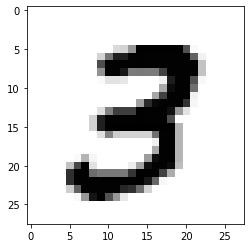

In [7]:
plt.imshow(x_train[7], cmap=plt.cm.binary)

In [8]:
print("Label:",y_train[5])

Label: 2


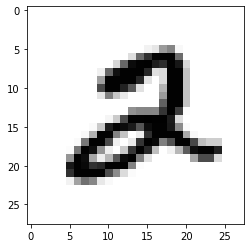

In [9]:
plt.imshow(x_train[5], cmap=plt.cm.binary)

In [10]:
print("Label:",y_train[3])

Label: 1


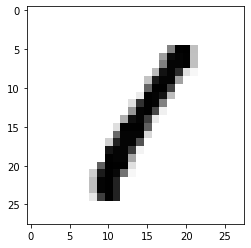

In [11]:
plt.imshow(x_train[3], cmap=plt.cm.binary)

## Let's redefine XTrain and XTest to Normalized Data 
### this makes it easy for the network to process the data

In [12]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


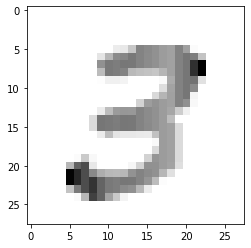

In [13]:
plt.imshow(x_train[7], cmap=plt.cm.binary)

In [14]:
print(x_train[7])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building the model

In [33]:
model = tf.keras.models.Sequential()

## Adding layers to the model

In [34]:
#I will be using RELU activation function
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))
#10 because 0-9 = 10

## Compiling and Fitting The Model

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

2021-12-05 00:34:09.329844: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1055 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9774


## checking loss and accuracy of the model

In [36]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)
## we got 97% accuracy and a low loss

313/313 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9640
0.11563374102115631 0.9639999866485596


### saving the model

In [37]:
model.save('digitsmodel.model')


INFO:tensorflow:Assets written to: digitsmodel.model/assets


# Loading The Model

In [20]:
new_model = tf.keras.models.load_model('digitsmodel.model')

In [21]:
prediction = new_model.predict([x_test])
prediction

array([[1.45138017e-07, 2.52667206e-07, 2.99632829e-05, ...,
        9.94565487e-01, 3.48916069e-06, 9.36331162e-06],
       [5.30762293e-07, 6.26529893e-03, 9.93532300e-01, ...,
        9.70646585e-09, 2.49180812e-06, 8.24048441e-10],
       [1.05433919e-07, 9.99603689e-01, 1.07854376e-05, ...,
        1.78216113e-04, 1.24143611e-04, 3.49372363e-06],
       ...,
       [4.61057548e-09, 1.78706648e-06, 1.00002728e-06, ...,
        1.39415875e-04, 7.49098990e-06, 1.86390302e-04],
       [8.29777093e-07, 1.26407895e-05, 7.34921002e-07, ...,
        5.37380365e-05, 9.73224232e-04, 1.18011831e-08],
       [5.53793882e-07, 6.21093932e-09, 3.64650603e-08, ...,
        1.12244311e-10, 2.76958323e-09, 5.44979617e-10]], dtype=float32)

## it can be used to predict now

In [22]:
pred = np.argmax(prediction[7])
pred

9

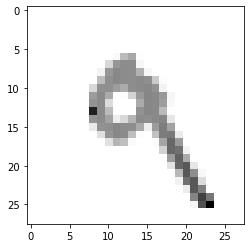

In [38]:
plt.imshow(x_test[7], cmap=plt.cm.binary)

In [24]:
pred = np.argmax(prediction[3])
pred

0

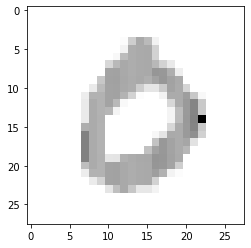

In [25]:
plt.imshow(x_test[3], cmap=plt.cm.binary)

In [26]:
pred = np.argmax(prediction[6])
pred

4

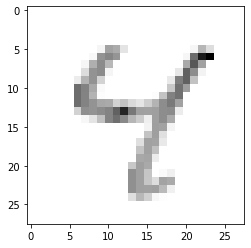

In [27]:
plt.imshow(x_test[6], cmap=plt.cm.binary)